In [1]:
# ============================================================
# 🧠 CALORIES BURNT PREDICTION — COMPLETE REGRESSION PIPELINE
# ============================================================

# ------------------------------------
# STEP 1️⃣: Import Libraries
# ------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib


In [2]:
# ------------------------------------
# STEP 2️⃣: Load and Merge Data
# ------------------------------------
exercise_data = pd.read_csv("/Users/Bala/Documents/Projects/Calories_Burnt_Prediction/data/exercise.csv")
calories_data = pd.read_csv("/Users/Bala/Documents/Projects/Calories_Burnt_Prediction/data/calories.csv")

In [7]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [8]:
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
# Merge on common key
merged_data = pd.merge(exercise_data, calories_data, on="User_ID")
print("✅ Data Loaded | Shape:", merged_data.shape)

✅ Data Loaded | Shape: (15000, 9)


In [6]:
merged_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
# ------------------------------------
# STEP 3️⃣: EDA (Basic)
# ------------------------------------
print("\nData Info:")
print(merged_data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


In [5]:
print("\nSummary Statistics:")
print(merged_data.describe())


Summary Statistics:
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.0000

In [9]:
print("\nMissing Values:\n", merged_data.isnull().sum())


Missing Values:
 User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


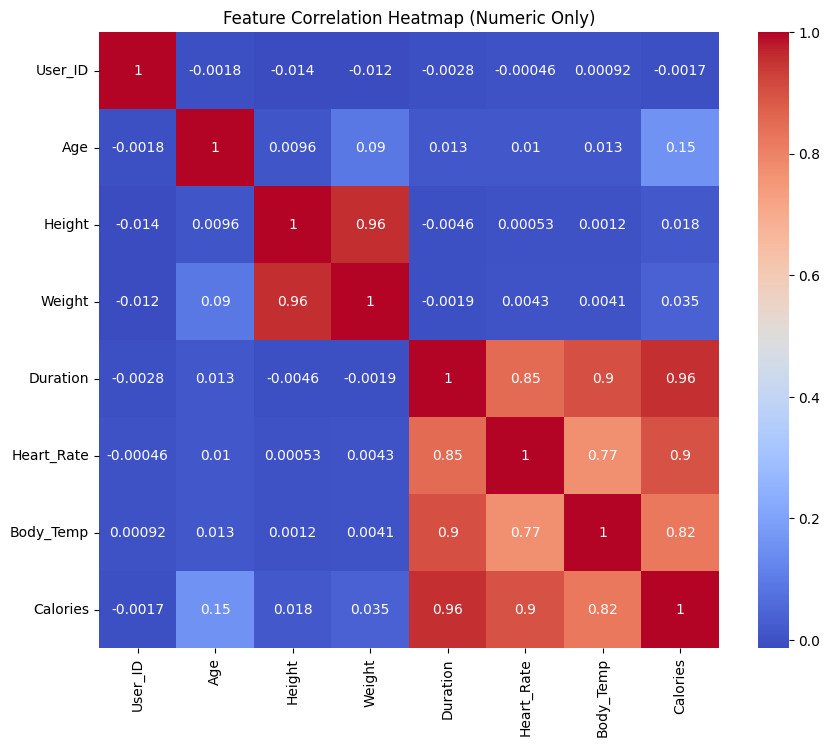

In [11]:
plt.figure(figsize=(10,8))
corr = merged_data.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Numeric Only)")
plt.show()

In [ ]:
# ------------------------------------
# STEP 4️⃣: Preprocessing & Feature Engineering
# ------------------------------------
merged_data["Gender"] = merged_data["Gender"].str.strip().str.lower().map({"male":0, "female":1})
merged_data = merged_data.drop(columns=["User_ID"])

In [14]:
merged_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [15]:

# Add BMI feature
merged_data["BMI"] = merged_data["Weight"] / ((merged_data["Height"]/100)**2)
merged_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063


In [16]:
# Fill missing values (if any)
merged_data = merged_data.fillna(merged_data.median())

In [17]:
# Define features and target
X = merged_data.drop(columns=["Calories"])
y = merged_data["Calories"]

In [19]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI
0,0,68,190.0,94.0,29.0,105.0,40.8,26.038781
1,1,20,166.0,60.0,14.0,94.0,40.3,21.773842
2,0,69,179.0,79.0,5.0,88.0,38.7,24.655910
3,1,34,179.0,71.0,13.0,100.0,40.5,22.159109
4,1,27,154.0,58.0,10.0,81.0,39.8,24.456063


In [22]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print("✅ Preprocessing Complete")

✅ Preprocessing Complete


In [24]:
X_scaled.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI
0,-1.007092,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,1.086705
1,0.992958,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,-1.649455
2,-1.007092,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,0.199528
3,0.992958,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,-1.402288
4,0.992958,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,0.071317


In [25]:

# ------------------------------------
# STEP 5️⃣: Split Before GridSearchCV (BEST PRACTICE)
# ------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\n✅ Split completed.")
print("Training set:", X_train.shape)
print("Testing set :", X_test.shape)


✅ Split completed.
Training set: (12000, 8)
Testing set : (3000, 8)


In [26]:
# ------------------------------------
# STEP 6️⃣: Define Models and Hyperparameter Grids
# ------------------------------------
model_list = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    XGBRegressor(random_state=42, verbosity=0)
]

model_hyperparameters = {
    'linear_regression_hyperparameters': {},

    'ridge_hyperparameters': {
        'alpha': [0.1, 1, 10, 50]
    },

    'lasso_hyperparameters': {
        'alpha': [0.001, 0.01, 0.1, 1, 10]
    },

    'decision_tree_hyperparameters': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    },

    'random_forest_hyperparameters': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None]
    },

    'xgb_hyperparameters': {
        'n_estimators': [100, 300, 500],
        'max_depth': [4, 6, 8],
        'learning_rate': [0.05, 0.1, 0.2]
    }
}

In [27]:
model_keys = list(model_hyperparameters.keys())

In [28]:
model_keys

['linear_regression_hyperparameters',
 'ridge_hyperparameters',
 'lasso_hyperparameters',
 'decision_tree_hyperparameters',
 'random_forest_hyperparameters',
 'xgb_hyperparameters']

In [33]:
# ------------------------------------
# STEP 7️⃣: Your Handwritten ModelSelection Function
# ------------------------------------
def ModelSelection(list_of_models, hyperparameters_dictionary):
    result = []
    i = 0

    for model in list_of_models:
        key = model_keys[i]
        params = hyperparameters_dictionary[key]
        i += 1

        print("\n====================================")
        print(f"🔍 Model: {model.__class__.__name__}")
        print(f"Hyperparameters: {params}")
        print("====================================")

        # Apply GridSearchCV only on training data
        regressor = GridSearchCV(
            estimator=model,
            param_grid=params,
            cv=5
        )
        regressor.fit(X_train, y_train)

        # Append results
        result.append({
            'model_used': model.__class__.__name__,
            'highest_score': regressor.best_score_,
            'best_parameters': regressor.best_params_
        })

    result_dataframe = pd.DataFrame(result, columns=['model_used', 'highest_score', 'best_parameters'])
    return result_dataframe

In [34]:
# ------------------------------------
# STEP 8️⃣: Run Model Selection on Training Data
# ------------------------------------
results_df = ModelSelection(model_list, model_hyperparameters)
results_df = results_df.sort_values(by='highest_score', ascending=False)

print("\n================ Model Comparison (CV on Train Data) ================")
print(results_df)



🔍 Model: LinearRegression
Hyperparameters: {}

🔍 Model: Ridge
Hyperparameters: {'alpha': [0.1, 1, 10, 50]}

🔍 Model: Lasso
Hyperparameters: {'alpha': [0.001, 0.01, 0.1, 1, 10]}


/Users/Bala/Documents/Projects/Calories_Burnt_Prediction/calories/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.268e+04, tolerance: 3.721e+03
  model = cd_fast.enet_coordinate_descent(
/Users/Bala/Documents/Projects/Calories_Burnt_Prediction/calories/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.296e+04, tolerance: 3.759e+03
  model = cd_fast.enet_coordinate_descent(
/Users/Bala/Documents/Projects/Calories_Burnt_Prediction/calories/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You


🔍 Model: DecisionTreeRegressor
Hyperparameters: {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}

🔍 Model: RandomForestRegressor
Hyperparameters: {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}

🔍 Model: XGBRegressor
Hyperparameters: {'n_estimators': [100, 300, 500], 'max_depth': [4, 6, 8], 'learning_rate': [0.05, 0.1, 0.2]}

================ Model Comparison (CV on Train Data) ================
              model_used  highest_score  \
5           XGBRegressor       0.999322   
4  RandomForestRegressor       0.997379   
3  DecisionTreeRegressor       0.989857   
0       LinearRegression       0.968702   
1                  Ridge       0.968702   
2                  Lasso       0.968702   

                                     best_parameters  
5  {'learning_rate': 0.1, 'max_depth': 4, 'n_esti...  
4           {'max_depth': None, 'n_estimators': 200}  
3          {'max_depth': 10, 'min_samples_split': 5}  
0                                                 {} 

In [35]:
results_df

,model_used,highest_score,best_parameters
5,XGBRegressor,0.999322,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti..."
4,RandomForestRegressor,0.997379,"{'max_depth': None, 'n_estimators': 200}"
3,DecisionTreeRegressor,0.989857,"{'max_depth': 10, 'min_samples_split': 5}"
0,LinearRegression,0.968702,{}
1,Ridge,0.968702,{'alpha': 0.1}
2,Lasso,0.968702,{'alpha': 0.001}


In [36]:
# ------------------------------------
# STEP 9️⃣: Evaluate Best Model on Test Data
# ------------------------------------
best_model_name = results_df.iloc[0]["model_used"]
best_params = results_df.iloc[0]["best_parameters"]

print(f"\n🏆 Best Model from GridSearchCV: {best_model_name}")
print("Best Parameters:", best_params)



🏆 Best Model from GridSearchCV: XGBRegressor
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}


In [37]:
# Instantiate best model
if best_model_name == "LinearRegression":
    final_model = LinearRegression()
elif best_model_name == "Ridge":
    final_model = Ridge(**best_params)
elif best_model_name == "Lasso":
    final_model = Lasso(**best_params)
elif best_model_name == "DecisionTreeRegressor":
    final_model = DecisionTreeRegressor(random_state=42, **best_params)
elif best_model_name == "RandomForestRegressor":
    final_model = RandomForestRegressor(random_state=42, **best_params)
else:
    final_model = XGBRegressor(random_state=42, verbosity=0, **best_params)


In [38]:
# Fit best model on TRAIN data
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
# Predict on TEST data
y_pred = final_model.predict(X_test)

In [40]:
# Evaluate test performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [41]:
print("\n📊 Final Model Evaluation on Test Data:")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.4f}")


📊 Final Model Evaluation on Test Data:
MAE  : 1.100
RMSE : 1.503
R²   : 0.9994


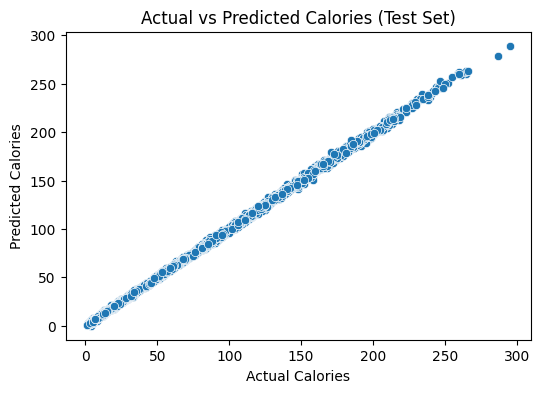

In [42]:

# Residual Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories (Test Set)")
plt.show()

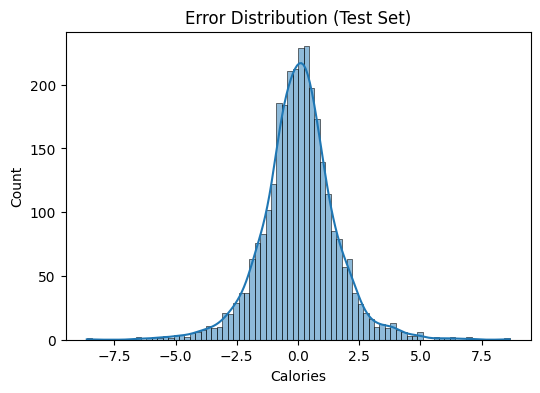

In [43]:
# Error Distribution
plt.figure(figsize=(6,4))
sns.histplot(y_test - y_pred, kde=True)
plt.title("Error Distribution (Test Set)")
plt.show()

In [44]:
# Shuffle target to break relationship
import numpy as np
y_shuffled = np.random.permutation(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_shuffled, test_size=0.2, random_state=42)

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
print("R² with shuffled target:", model.score(X_test, y_test))


R² with shuffled target: -0.11088600248705438
